In [ ]:
import pandas as pd
df = pd.read_csv('dataset_uas.csv')

In [ ]:
print(df.head())

   Customer_ID           Customer_Name Customer_Type      City  Country  \
0       220000                Jane Doe      Consumer     Malmo   Sweden   
1       220001           Mike Williams      Consumer    Berlin  Germany   
2       110000    Summit Networks Inc.      Business  Al Jahra   Kuwait   
3       110001  Global Industries Inc.      Business    Munich  Germany   
4       220002          Sarah Williams      Consumer     Dubai      UAE   

   Order_Number   Status Vehicle_Brand Vehicle_Model Product_Type  ...  \
0        889425  Shipped       Renault        Captur      Vehicle  ...   
1        209324  Shipped           BMW            M3      Vehicle  ...   
2        456711  Shipped        Toyota       Corolla       Repair  ...   
3        605920  Shipped        Toyota          Aqua      Vehicle  ...   
4        890996  Shipped       Renault        Megane      Vehicle  ...   

  Salesperson_Name Qtr_ID  Month_ID  Year_ID  Contact_Last_Name  \
0   Emma Johansson      2         5  

In [ ]:
print(df.columns)

Index(['Customer_ID', 'Customer_Name', 'Customer_Type', 'City', 'Country',
       'Order_Number', 'Status', 'Vehicle_Brand', 'Vehicle_Model',
       'Product_Type', 'Order_Date', 'Update_Date', 'Order_Line_Number',
       'Price_Each', 'Quantity_Ordered', 'Revenue', 'MSRP', 'Deal_Size',
       'Insurance_Amount', 'Warranty_Policy_ID', 'Contact_ID', 'Policy_No',
       'Salesperson_ID', 'Salesperson_Name', 'Qtr_ID', 'Month_ID', 'Year_ID',
       'Contact_Last_Name', 'Contact_First_Name', 'Insurance_Status',
       'Insurance_Start_Date', 'Insurance_End_Date', 'Spare_Part_Type'],
      dtype='object')


In [ ]:
print(df.shape)

(20400, 33)


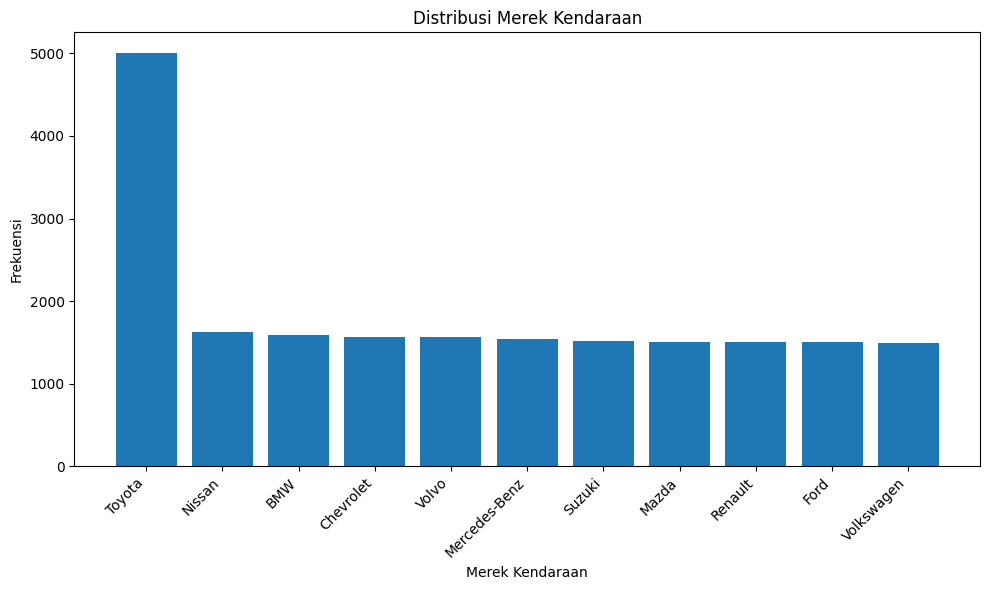

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Merek kendaraan
brand_counts = df['Vehicle_Brand'].value_counts()

# Diagram batang
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Merek Kendaraan')
plt.ylabel('Frekuensi')
plt.title('Distribusi Merek Kendaraan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 46501413292622.24
R-squared (R2): 0.92


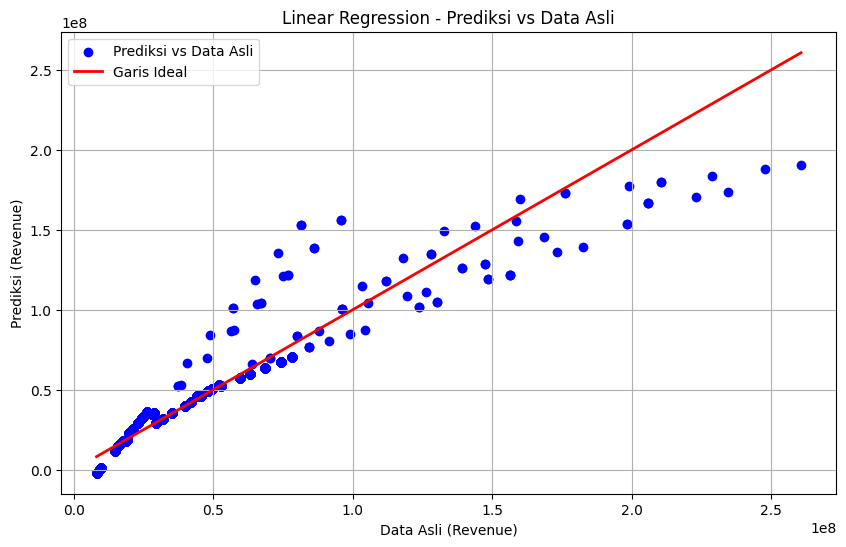

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preprocessing sederhana: Menghapus baris dengan nilai kosong dan mengubah tanggal ke format numerik jika ada
df_clean = df.dropna(subset=['Price_Each', 'Quantity_Ordered', 'Revenue'])

# Memilih fitur dan target untuk regresi linier
X = df_clean[['Price_Each', 'Quantity_Ordered']]
y = df_clean['Revenue']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi menggunakan model
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Data Asli')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Garis Ideal')
plt.title('Linear Regression - Prediksi vs Data Asli')
plt.xlabel('Data Asli (Revenue)')
plt.ylabel('Prediksi (Revenue)')
plt.legend()
plt.grid(True)
plt.show()

Confusion Matrix:
[[2635    0]
 [   0 1445]]

Classification Report:
              precision    recall  f1-score   support

 Not Popular       1.00      1.00      1.00      2635
     Popular       1.00      1.00      1.00      1445

    accuracy                           1.00      4080
   macro avg       1.00      1.00      1.00      4080
weighted avg       1.00      1.00      1.00      4080



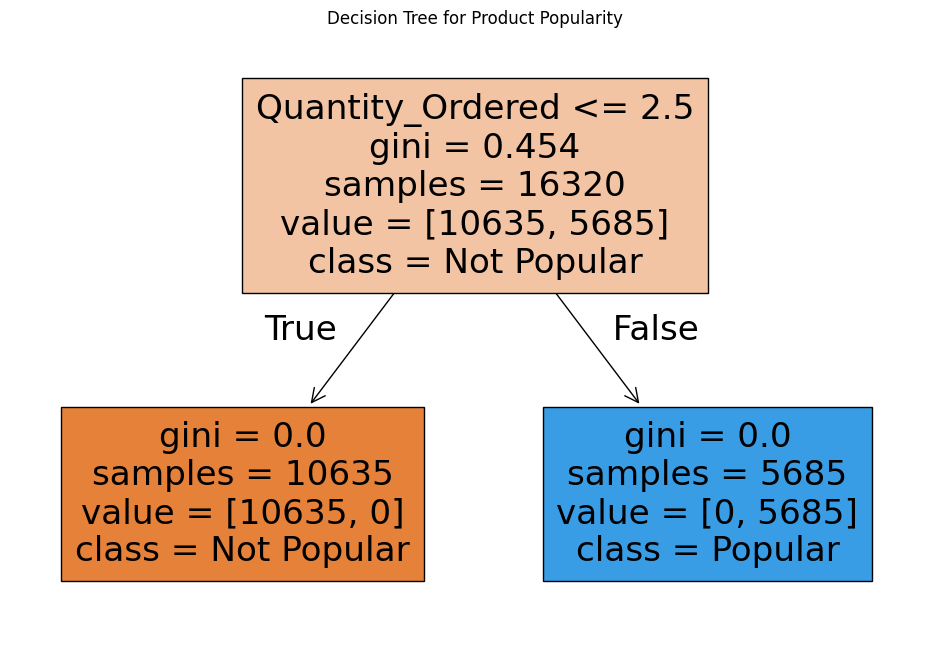

Merek produk populer:
Vehicle_Brand
Toyota           1785
Nissan            580
Chevrolet         566
Volvo             566
Mercedes-Benz     544
BMW               538
Mazda             522
Renault           521
Ford              516
Suzuki            505
Volkswagen        487
Name: count, dtype: int64

Merek produk tidak populer:
Vehicle_Brand
Toyota           3218
BMW              1055
Nissan           1042
Suzuki           1012
Volkswagen       1004
Chevrolet         999
Volvo             996
Mercedes-Benz     992
Ford              985
Mazda             984
Renault           983
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Mengasumsikan produk populer jika jumlah pesanan di atas median
median_quantity = df['Quantity_Ordered'].median()
df['Popularity'] = np.where(df['Quantity_Ordered'] > median_quantity, 'Popular', 'Not Popular')

# Menghapus nilai kosong pada kolom yang relevan
df_class = df.dropna(subset=['Popularity', 'Price_Each', 'Quantity_Ordered'])

# Mengubah target klasifikasi ke bentuk numerik
label_encoder = LabelEncoder()
df_class['Popularity_Encoded'] = label_encoder.fit_transform(df_class['Popularity'])

# Memilih fitur dan target untuk klasifikasi
X_class = df_class[['Price_Each', 'Quantity_Ordered']]
y_class = df_class['Popularity_Encoded']

# Membagi dataset menjadi training dan testing set
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Membuat model Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Prediksi menggunakan model
y_pred_class = clf.predict(X_test_class)

# Evaluasi model
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class, target_names=label_encoder.classes_)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualisasi Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Price_Each', 'Quantity_Ordered'], class_names=label_encoder.classes_, filled=True)
plt.title('Decision Tree for Product Popularity')
plt.show()

# Menambahkan hasil prediksi ke dalam dataset
df_class['Predicted_Popularity'] = label_encoder.inverse_transform(clf.predict(X_class))

# Menampilkan merek produk untuk kategori 'Popular'
popular_brands = df_class[df_class['Predicted_Popularity'] == 'Popular']['Vehicle_Brand'].value_counts()

# Menampilkan merek produk untuk kategori 'Not Popular'
not_popular_brands = df_class[df_class['Predicted_Popularity'] == 'Not Popular']['Vehicle_Brand'].value_counts()

# Menampilkan hasil
print("Merek produk populer:")
print(popular_brands)

print("\nMerek produk tidak populer:")
print(not_popular_brands)


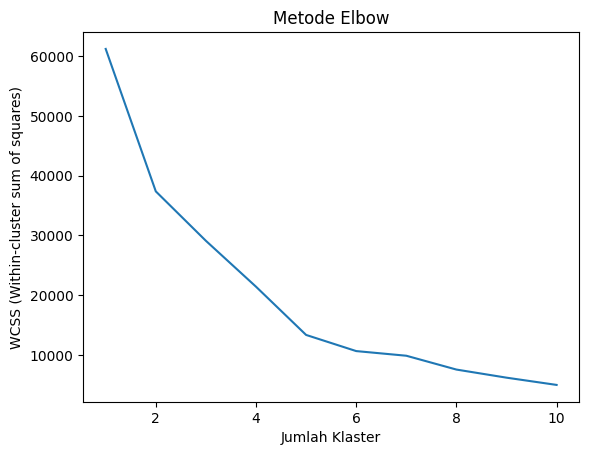

   Customer_ID  Quantity_Ordered   Revenue  Price_Each  Cluster
0       220000                 2  18728200     9364100        0
1       220001                 3  78219600    26073200        2
2       110000                 2  42108200    21054100        1
3       110001                 3  28092300     9364100        0
4       220002                 1  21054100    21054100        1


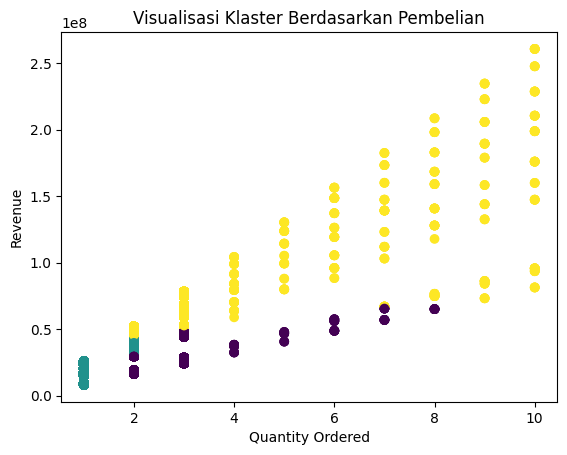

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

features = df[['Quantity_Ordered', 'Revenue', 'Price_Each']]

features = features.dropna()

# Standarisasi data untuk menghindari dominasi fitur dengan skala lebih besar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Tentukan jumlah klaster yang optimal menggunakan Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method untuk menentukan jumlah klaster optimal
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

# Berdasarkan visualisasi elbow, pilih jumlah klaster (misalnya 3)
k = 3

# Terapkan K-Means dengan jumlah klaster yang terpilih
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Menambahkan kolom klaster ke DataFrame asli
df['Cluster'] = kmeans.labels_

# Menampilkan hasil klasterisasi
print(df[['Customer_ID', 'Quantity_Ordered', 'Revenue', 'Price_Each', 'Cluster']].head())

# Visualisasi hasil klaster (untuk data 2 dimensi, menggunakan dua fitur pertama)
plt.scatter(df['Quantity_Ordered'], df['Revenue'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Quantity Ordered')
plt.ylabel('Revenue')
plt.title('Visualisasi Klaster Berdasarkan Pembelian')
plt.show()
